Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


Databricks workspace is used to solve this assignment

Installing Required libraries 

In [0]:
pip install Augmentor

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
%sh

sudo apt-get install -y python3-dev graphviz libgraphviz-dev pkg-config

Reading package lists...
Building dependency tree...
Reading state information...
pkg-config is already the newest version (0.29.2-1ubuntu3).
pkg-config set to manually installed.
The following additional packages will be installed:
  fonts-liberation javascript-common libann0 libcdt5 libcgraph6 libgail-common
  libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgts-0.7-5 libgts-bin
  libgvc6 libgvc6-plugins-gtk libgvpr2 libjs-jquery libjs-sphinxdoc
  libjs-underscore liblab-gamut1 libpathplan4 libpython3-dev libxdot4
Suggested packages:
  gsfonts graphviz-doc apache2 | lighttpd | httpd gvfs
The following NEW packages will be installed:
  fonts-liberation graphviz javascript-common libann0 libcdt5 libcgraph6
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgts-0.7-5 libgts-bin libgvc6 libgvc6-plugins-gtk
  libgvpr2 libjs-jquery libjs-sphinxdoc libjs-underscore liblab-gamut1
  libpathplan4 libpython3-dev libxdot4 python3-dev
0 upgraded, 25 

debconf: delaying package configuration, since apt-utils is not installed


Fetched 7,709 kB in 1s (10.5 MB/s)
Selecting previously unselected package fonts-liberation.
(Reading database ... 98360 files and directories currently installed.)
Preparing to unpack .../00-fonts-liberation_1%3a1.07.4-11_all.deb ...
Unpacking fonts-liberation (1:1.07.4-11) ...
Selecting previously unselected package libann0.
Preparing to unpack .../01-libann0_1.1.2+doc-7build1_amd64.deb ...
Unpacking libann0 (1.1.2+doc-7build1) ...
Selecting previously unselected package libcdt5:amd64.
Preparing to unpack .../02-libcdt5_2.42.2-6_amd64.deb ...
Unpacking libcdt5:amd64 (2.42.2-6) ...
Selecting previously unselected package libcgraph6:amd64.
Preparing to unpack .../03-libcgraph6_2.42.2-6_amd64.deb ...
Unpacking libcgraph6:amd64 (2.42.2-6) ...
Selecting previously unselected package libgts-0.7-5:amd64.
Preparing to unpack .../04-libgts-0.7-5_0.7.6+darcs121130-5_amd64.deb ...
Unpacking libgts-0.7-5:amd64 (0.7.6+darcs121130-5) ...
Selecting previously unselected package libpathplan4:amd64.


In [0]:
%sh

pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168136 sha256=7806b266812ff1fcd6b0e0165b757ffb09be62fc8e5511e213b766025c103ea6
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [0]:
pip install pydot

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
dbutils.fs.ls('/FileStore/tables/cnn/datasets/CNN_assignment.zip')

[FileInfo(path='dbfs:/FileStore/tables/cnn/datasets/CNN_assignment.zip', name='CNN_assignment.zip', size=823790659, modificationTime=1712287200000)]

In [0]:
import zipfile
path_to_zip_file='/dbfs/FileStore/tables/cnn/datasets/CNN_assignment.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall('/dbfs/FileStore/tables/cnn/datasets/')

In [0]:
dbutils.fs.ls('/FileStore/tables/cnn/datasets/')

[FileInfo(path='dbfs:/FileStore/tables/cnn/datasets/CNN_assignment.zip', name='CNN_assignment.zip', size=823790659, modificationTime=1712287200000),
 FileInfo(path='dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/', name='Skin cancer ISIC The International Skin Imaging Collaboration/', size=0, modificationTime=1712287439000)]

In [0]:
display(dbutils.fs.ls('/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/'))

path name size modificationTime dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/ Test/ 0 1712287439000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/ Train/ 0 1712287451000

In [0]:
display(dbutils.fs.ls('/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'))

path name size modificationTime dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ actinic keratosis/ 0 1712287451000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ basal cell carcinoma/ 0 1712287460000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ dermatofibroma/ 0 1712287487000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ melanoma/ 0 1712287494000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ nevus/ 0 1712287527000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ pigmented benign keratosis/ 0 1712287558000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ seborrheic keratosis/ 0 1712287593000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ squamous cell carcinoma/ 0 1712287597000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ vascular lesion/ 0 1712287610000

We can see images of train and test are loaded to the local directory of Databricks workspace for the further usage 

In [0]:
display(dbutils.fs.ls('/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/'))

path name size modificationTime dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg ISIC_0025780.jpg 260942 1712320175000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025803.jpg ISIC_0025803.jpg 312743 1712320175000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025825.jpg ISIC_0025825.jpg 294418 1712320175000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025953.jpg ISIC_0025953.jpg 273040 1712320175000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025957.jpg ISIC_0025957.jpg 260619 1712320175000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025992.jpg ISIC_0025992.jpg 249077 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026040.jpg ISIC_0026040.jpg 245057 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026149.jpg ISIC_0026149.jpg 231529 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026171.jpg ISIC_0026171.jpg 321683 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026194.jpg ISIC_0026194.jpg 252103 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026212.jpg ISIC_0026212.jpg 298308 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026457.jpg ISIC_0026457.jpg 271535 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026468.jpg ISIC_0026468.jpg 155738 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026525.jpg ISIC_0026525.jpg 273790 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026575.jpg ISIC_0026575.jpg 274739 1712320176000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026625.jpg ISIC_0026625.jpg 301284 1712320177000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026626.jpg ISIC_0026626.jpg 290951 1712320177000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026650.jpg ISIC_0026650.jpg 252523 1712320177000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026702.jpg ISIC_0026702.jpg 279799 1712320177000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026709.jpg ISIC_0026709.jpg 301437 1712320177000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026729.jpg ISIC_0026729.jpg 246442 1712320177000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026765.jpg ISIC_0026765.jpg 265203 1712320177000 dbfs:/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Ski

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion
 

### Importing all the important libraries

In [0]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

In [0]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [0]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [0]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [0]:
# train dataset 

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)



Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [0]:
# validation dataset 
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [0]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Found 2239 files belonging to 9 classes.


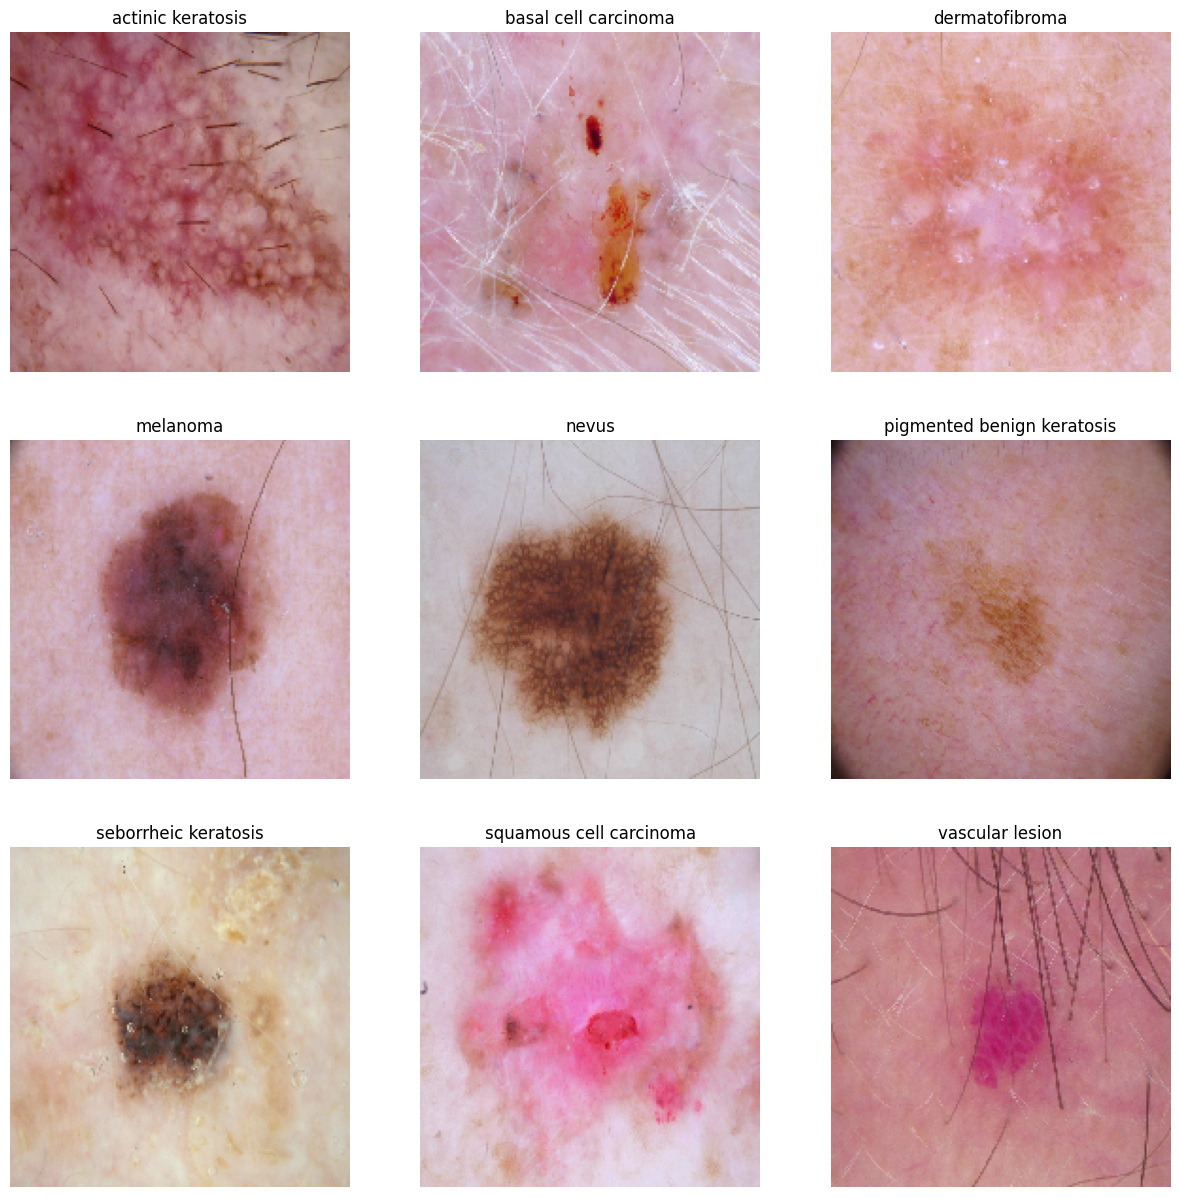

In [0]:
#Visualize one instance of all the class present in the dataset.
from tensorflow.keras.preprocessing.image import load_img

#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the Model which can accurately detect 9 classes present in the dataset. Using ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [0]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))



#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))



#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 128)      

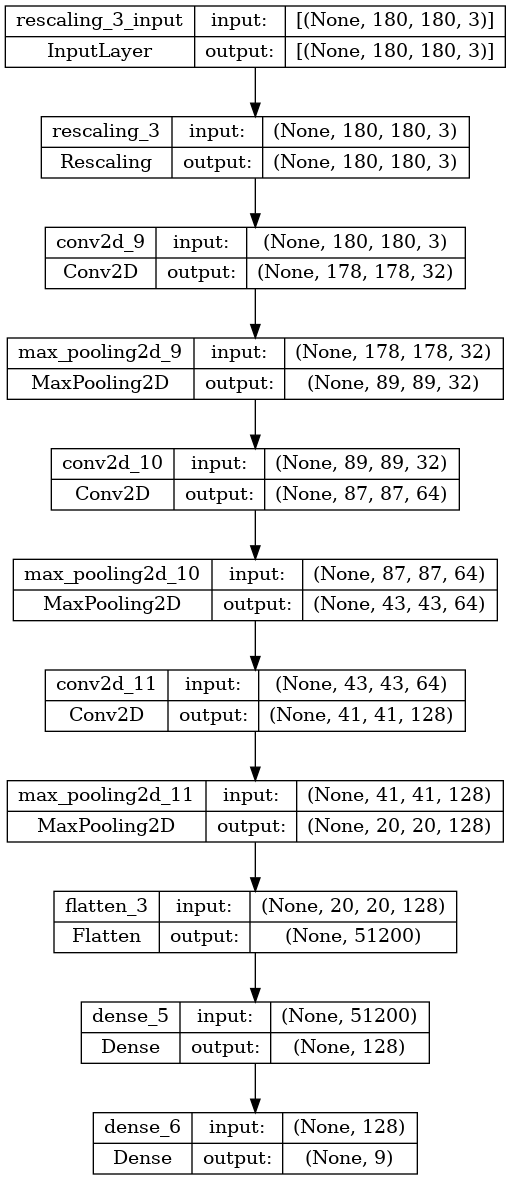

In [0]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [0]:
### Choosing an appropirate optimiser and loss function

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])


### Train the model

In [0]:
#Compile the Model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [0]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 2.0269 - accuracy: 0.2712
Epoch 1: val_accuracy improved from -inf to 0.26622, saving model to model.h5
56/56 [==============================] - 18s 303ms/step - loss: 2.0269 - accuracy: 0.2712 - val_loss: 1.8303 - val_accuracy: 0.2662
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 1.5721 - accuracy: 0.4565
Epoch 2: val_accuracy improved from 0.26622 to 0.45638, saving model to model.h5
56/56 [==============================] - 17s 301ms/step - loss: 1.5721 - accuracy: 0.4565 - val_loss: 1.5383 - val_accuracy: 0.4564
Epoch 3/20
36/56 [==================>...........] - ETA: 5s - loss: 1.4405 - accuracy: 0.4861

*** WARNING: max output size exceeded, skipping output. ***

56/56 [==============================] - ETA: 0s - loss: 1.1557 - accuracy: 0.5765
Epoch 7: val_accuracy did not improve from 0.51678
56/56 [================

INFO:tensorflow:Assets written to: /tmp/tmp4d18fn0b/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp4d18fn0b/model/data/model/assets


### Visualizing training results

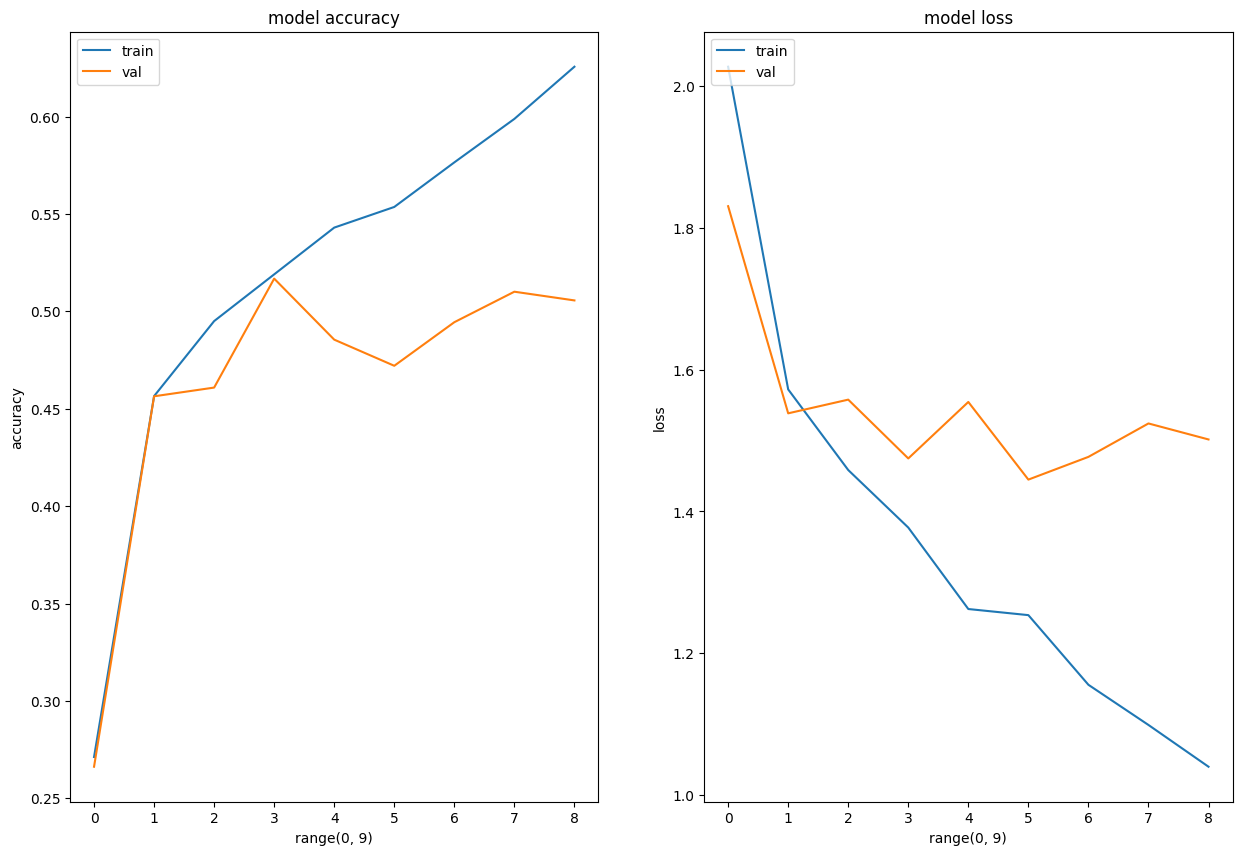

In [0]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Observation 

- **loss: 1.0402 - accuracy: 0.6256 - val_loss: 1.5015 - val_accuracy: 0.5056**

- **Its quite evident the model accuracy is very less** 

- **Model is overfitting as we can see the drop of validation accuracy** 



Lets create a model by adding dropout layers to figureout whether its helping to solve the overfit problem and also to check whether it helps to boost the performance


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 41, 128)      

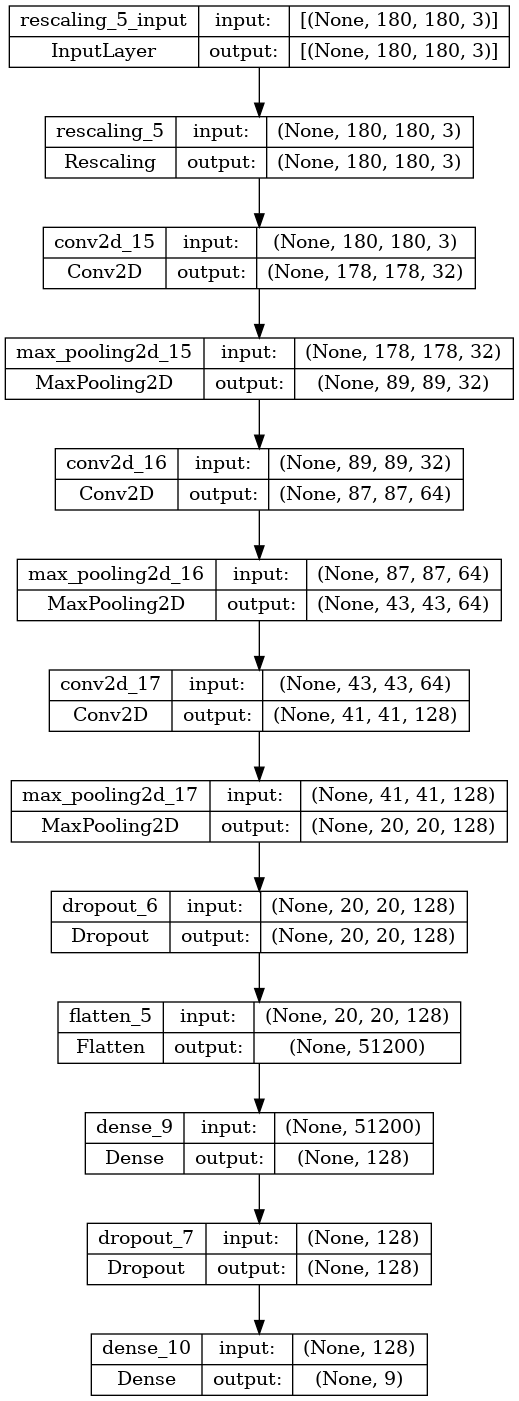

In [0]:
#CNN Model Architecture with Dropout layers

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



### Compiling and the model

In [0]:
#Compile the Model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 1.9707 - accuracy: 0.2857
Epoch 1: val_accuracy improved from -inf to 0.37808, saving model to model.h5
56/56 [==============================] - 18s 300ms/step - loss: 1.9707 - accuracy: 0.2857 - val_loss: 1.7741 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 1.6709 - accuracy: 0.4079
Epoch 2: val_accuracy improved from 0.37808 to 0.49664, saving model to model.h5
56/56 [==============================] - 17s 299ms/step - loss: 1.6709 - accuracy: 0.4079 - val_loss: 1.5339 - val_accuracy: 0.4966
Epoch 3/20
36/56 [==================>...........] - ETA: 5s - loss: 1.5521 - accuracy: 0.4601

*** WARNING: max output size exceeded, skipping output. ***

56/56 [==============================] - ETA: 0s - loss: 0.9898 - accuracy: 0.6395
Epoch 11: val_accuracy did not improve from 0.55034
56/56 [=================

INFO:tensorflow:Assets written to: /tmp/tmpa8ft_f1t/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpa8ft_f1t/model/data/model/assets


### Visualizing the results

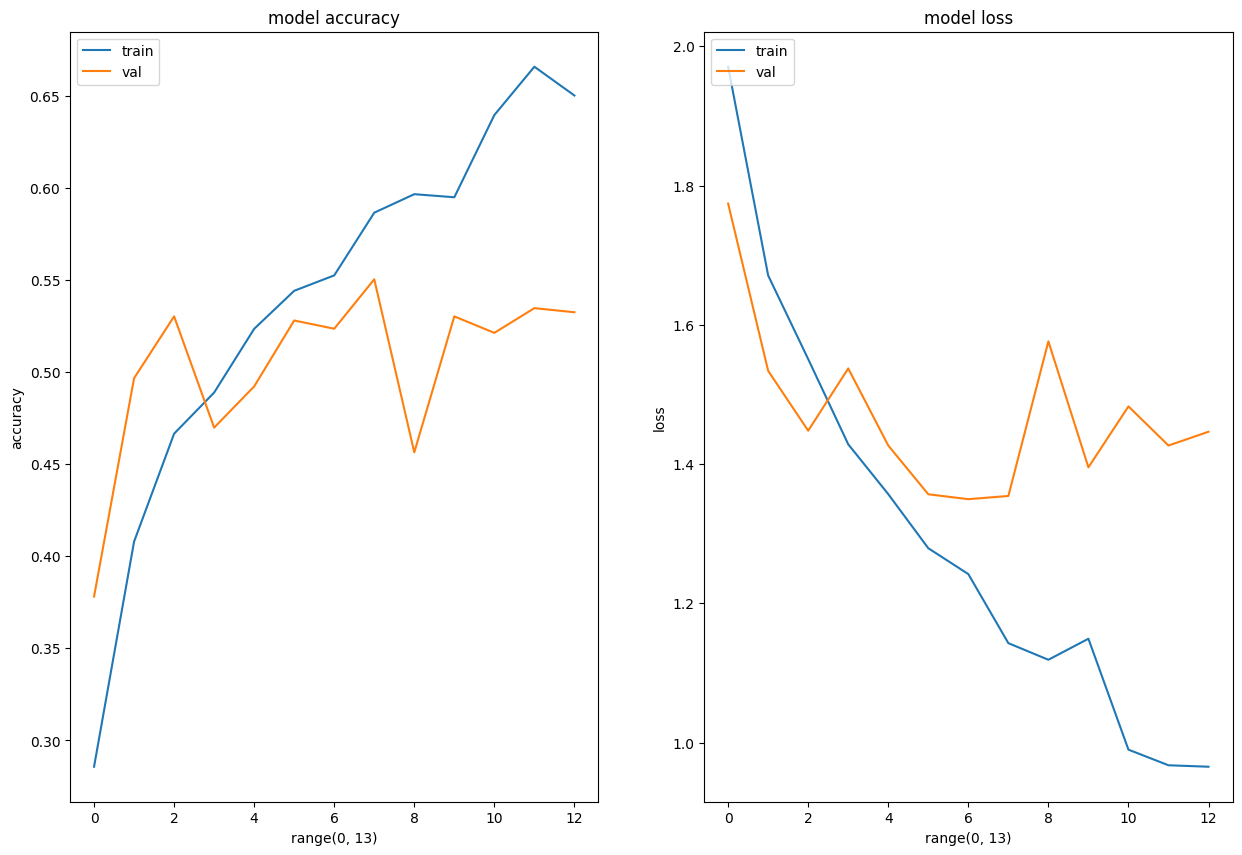

In [0]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Observation 

- **loss: 0.9653 - accuracy: 0.6501 - val_loss: 1.4465 - val_accuracy: 0.5324**

- **Its quite evident the model accuracy is not improved much and we still see the overfitting is happening even after adding the dropout layers less** 


Lets analyse further on what could be the reason for less acuracy by understanding the class balance


In [0]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
print(df)
print(f"average : {df['No. of Image'].sum()/9}")

                        Class  No. of Image
0           actinic keratosis           114
1        basal cell carcinoma           376
2              dermatofibroma            95
3                    melanoma           438
4                       nevus           357
5  pigmented benign keratosis           462
6        seborrheic keratosis            77
7     squamous cell carcinoma           181
8             vascular lesion           139
average : 248.77777777777777


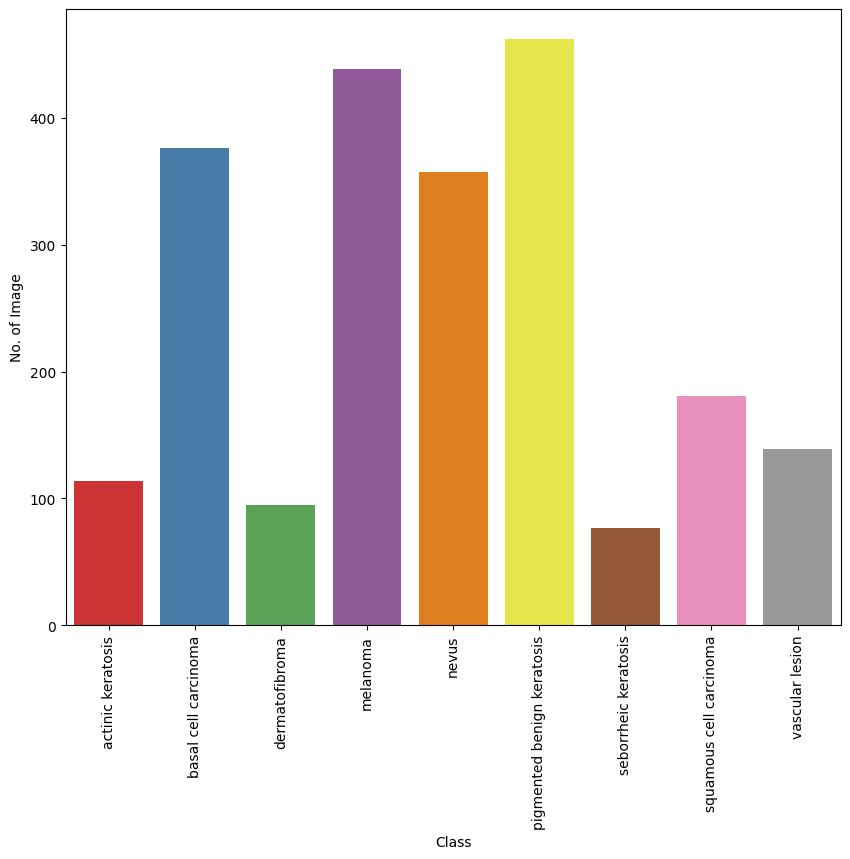

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.barplot(x='Class', y='No. of Image', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

#### Findings
- Which class has the least number of samples? - Answer: seborrheic keratosis has the least number of samples
- Which classes dominate the data in terms proportionate number of samples? - Answer: pigmented benign keratosis has the highest number of samples compared to the rest of the class
- **Very much visible , there is a class imbalance which could be the potential reason for getting less accuracy**


#### Rectifying the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [0]:
path_to_training_dataset="/dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1E04D8BDF0>:  33%|███▎      | 166/500 [00

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1E1C20B6D0>: 100%|██████████| 500/500 [00:07<00:00, 66.61 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1E1C1D33A0>: 100%|██████████| 500/500 [00:07<00:00, 69.00 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1E04B48F70>: 100%|██████████| 500/500 [00:07<00:00, 70.91 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1E04CDF

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F1E1C9874F0>: 100%|██████████| 500/500 [00:08<00:00, 59.40 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 a

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F1E04B9E770>: 100%|██████████| 500/500 [00:07<00:00, 66.22 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1E1CA45090>:  33%|███▎      | 166/500 [00:02

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1E04B4A680>: 100%|██████████| 500/500 [00:07<00:00, 70.23 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1E0C153CA0>:  33%|███▎      | 163/500 [00:02<00:05, 6

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1E3C9BB2E0>: 100%|██████████| 500/500 [00:07<00:00, 69.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1E04CDEC20>:  3

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1E1C64A290>: 100%|██████████| 500/500 [00:08<00:00, 60.27 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /dbfs/FileStore/tables/cnn/datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <

*** WARNING: max output size exceeded, skipping output. ***

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1E1C272470>: 100%|██████████| 500/500 [00:07<00:00, 69.69 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [0]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [0]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [0]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [0]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [0]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Class'])
df2=df2['Class'].value_counts() 
df2=pd.DataFrame(df2)

In [0]:
df2=df2.reset_index()
df2=df2.rename(columns={'index': 'Class', 'Class': 'No. of Image'})
df2

Class  No. of Image
0           actinic keratosis           500
1        basal cell carcinoma           500
2              dermatofibroma           500
3                    melanoma           500
4                       nevus           500
5  pigmented benign keratosis           500
6        seborrheic keratosis           500
7     squamous cell carcinoma           500
8             vascular lesion           500

In [0]:
merged_df=df2.append(df)

/root/.ipykernel/3555/command-2286891235238135-1688593739:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df=df2.append(df)


In [0]:
merged_df.groupby('Class').sum()

No. of Image
Class                                   
actinic keratosis                    614
basal cell carcinoma                 876
dermatofibroma                       595
melanoma                             938
nevus                                857
pigmented benign keratosis           962
seborrheic keratosis                 577
squamous cell carcinoma              681
vascular lesion                      639

So, now we have added 500 images to all the classes to mitigate class imbalance. 

#### **Train the model on the data created using Augmentor**

In [0]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training and validation dataset

In [0]:
# train dataset 

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


# validation dataset 
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (Added normalization)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 41, 41, 128)      

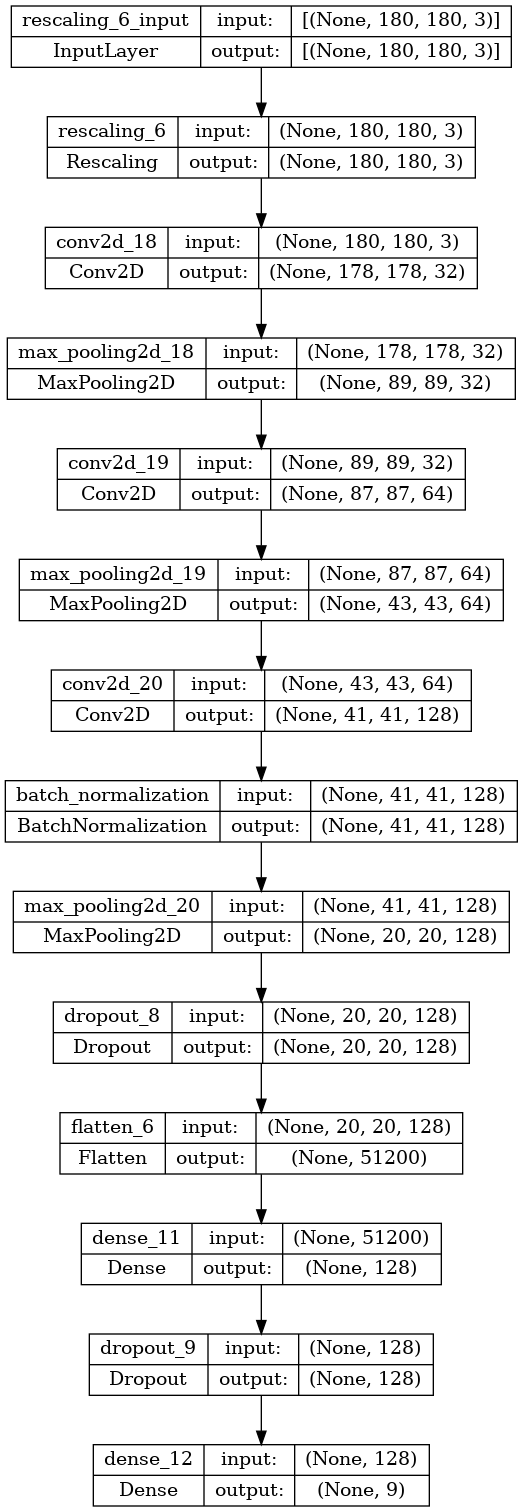

In [0]:
#CNN Model Architecture with Dropout layers

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))

#Batch Normalisation
model.add(BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



#### Compiling and Training the model

In [0]:
#Compile the Model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

# Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/30
147/169 [=========================>...

*** WARNING: max output size exceeded, skipping output. ***

169/169 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.9008
Epoch 19: val_accuracy did not improve from 0.73497
169/169 [==============================] - 56s 328ms/step - loss: 0.2870 - accuracy: 0.9008 - val_loss: 1.7988 - val_accuracy: 0.6288
Epoch 19: early stopping


1/1 [==============================] - 0s 90ms/step


INFO:tensorflow:Assets written to: /tmp/tmpr9vh0k39/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpr9vh0k39/model/data/model/assets


####  Visualize the model results

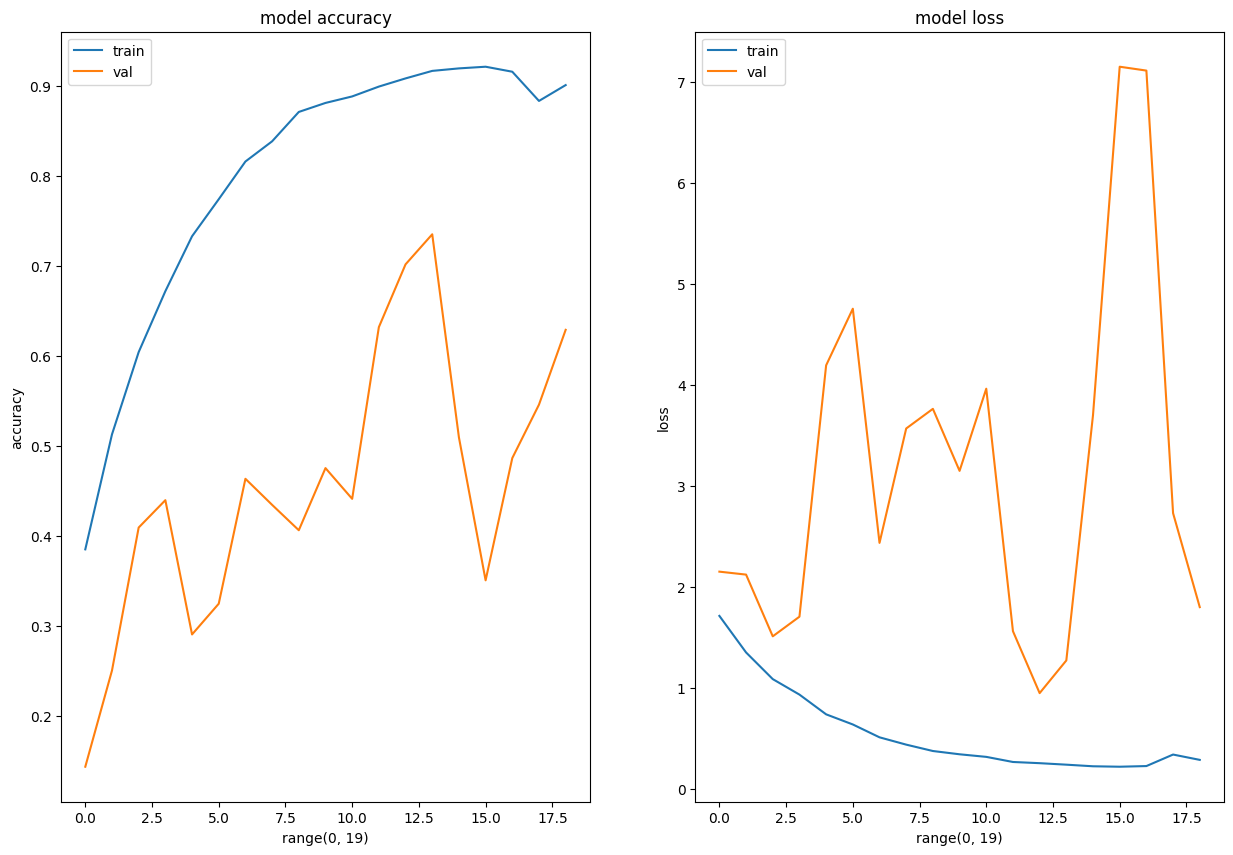

In [0]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- **Loss: 0.2870 - accuracy: 0.9008 - val_loss: 1.7988 - val_accuracy: 0.6288**
- **Handling the class imbalance and adding batch normalization, we can still see the model is overfitting**
- **The accuracy is increased by the validation accuracy is less**
- **Lets retry the model without batch normalisation**

#Model Building - Removed Batch Normalisation 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 41, 41, 128)      

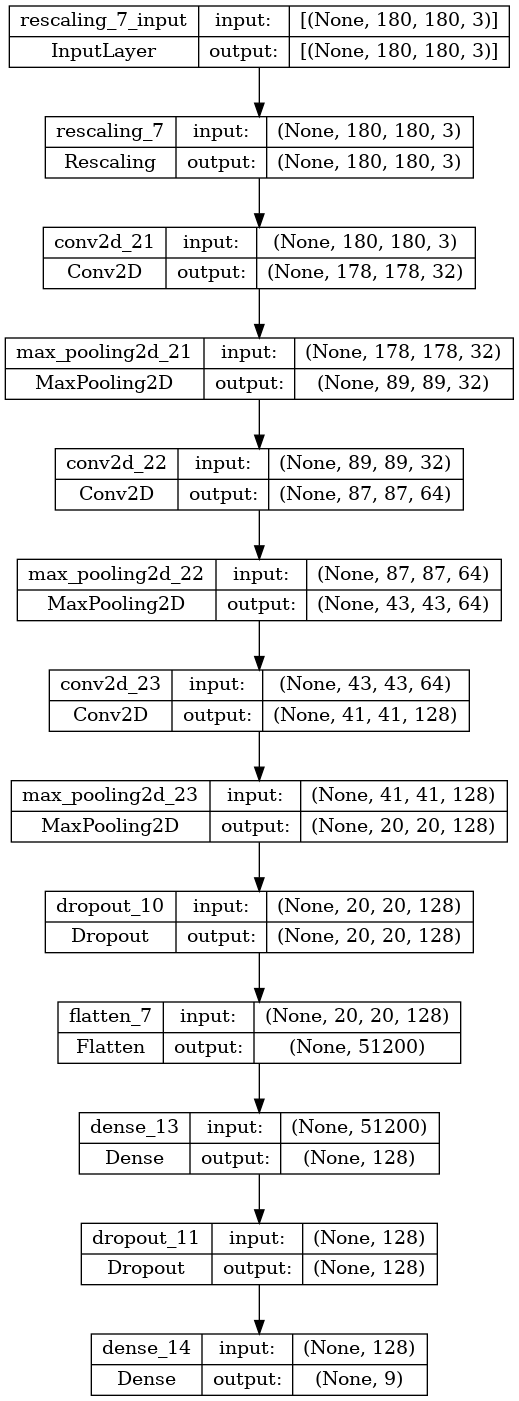

In [0]:
#CNN Model Architecture with Dropout layers

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.50))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)





In [0]:
#Compile the Model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

# Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/30
147/169 [=========================>....]

*** WARNING: max output size exceeded, skipping output. ***

169/169 [==============================] - ETA: 0s - loss: 0.3969 - accuracy: 0.8498
Epoch 29: val_accuracy did not improve from 0.82405
169/169 [==============================] - 58s 336ms/step - loss: 0.3969 - accuracy: 0.8498 - val_loss: 0.6842 - val_accuracy: 0.8174
Epoch 29: early stopping


1/1 [==============================] - 0s 92ms/step


INFO:tensorflow:Assets written to: /tmp/tmp6sblehmb/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp6sblehmb/model/data/model/assets


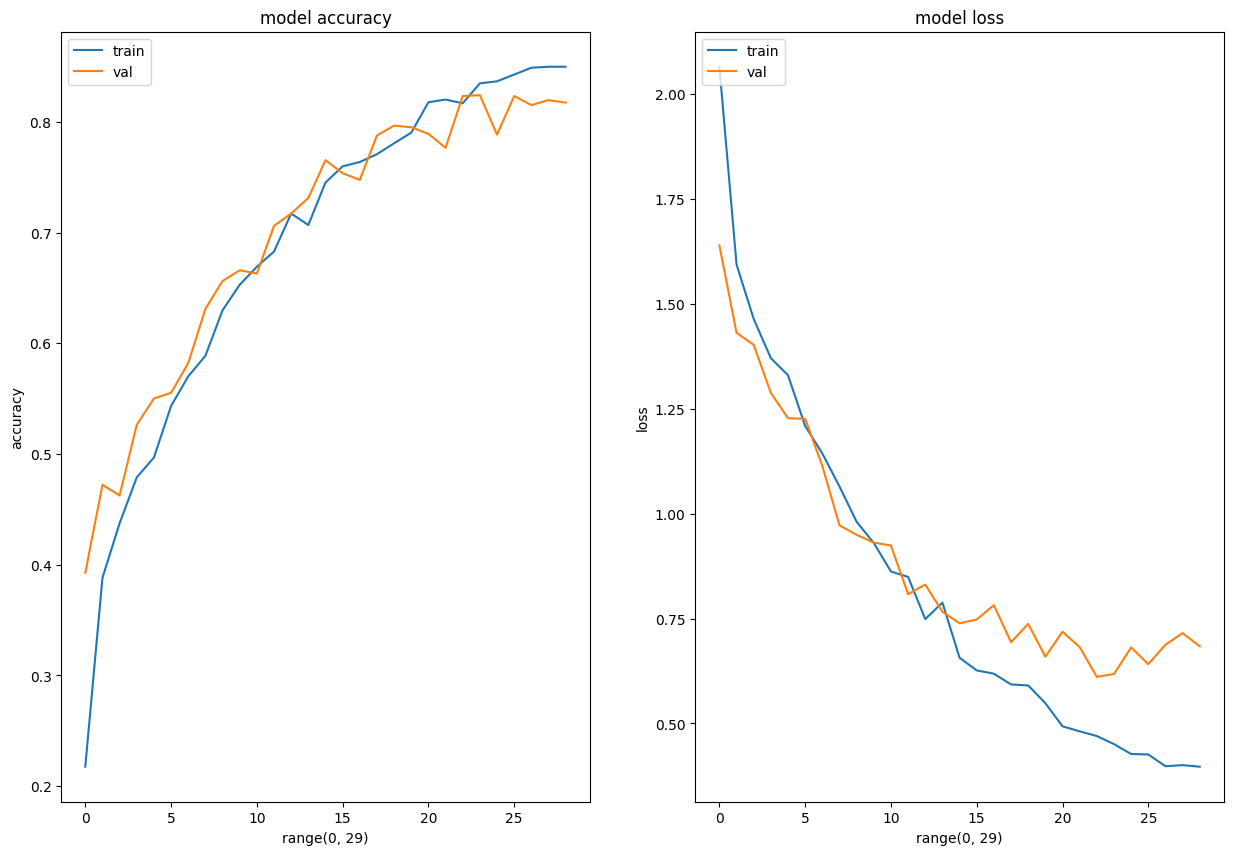

In [0]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Findings 
- **Batch Normalisation was not helping to address the overfitting issue**
- **Removing Batch Normalisation from the netwrok and addressing the class imbalance alone helped to address the accuracy and overfitting**
- **Accuracy of the model is 85% and validation accuracy is 82%**

**Model can still do better , lets try by adding more droput layers and change the network & training with 50 epochs**

In [0]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)


model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3))) 
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),activation='softmax'))


learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
# View the summary of all layers
model.summary()

epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                    

INFO:tensorflow:Assets written to: /tmp/tmp2asibef3/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp2asibef3/model/data/model/assets


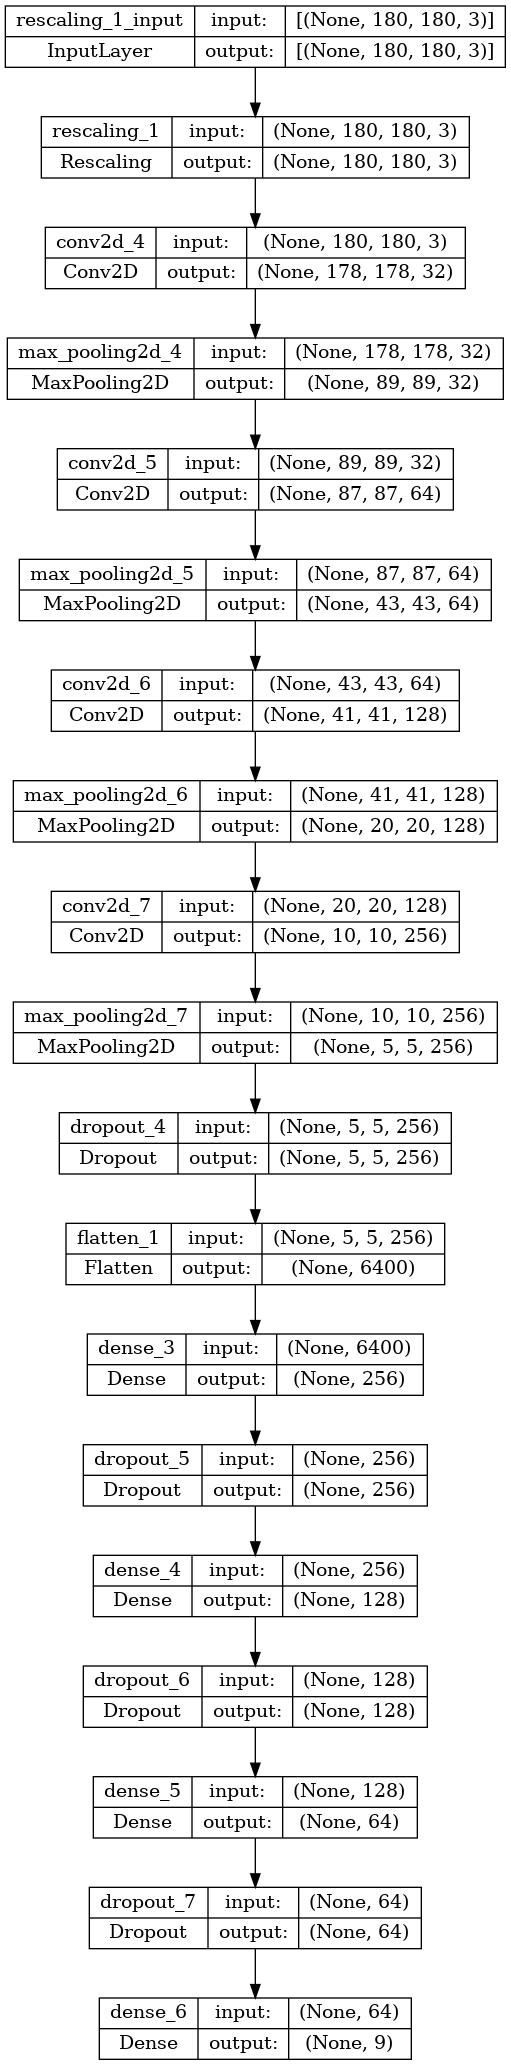

In [0]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


- **Redesigning the model with the above layers with 4 dropouts and running the training for 50 epochs helped to increase the accuracy further**
- **loss: 0.3344 - accuracy: 0.8793 - val_loss: 0.3452 - val_accuracy: 0.8872 - lr: 0.0010**
- **Lets fix this model as a finalised model**

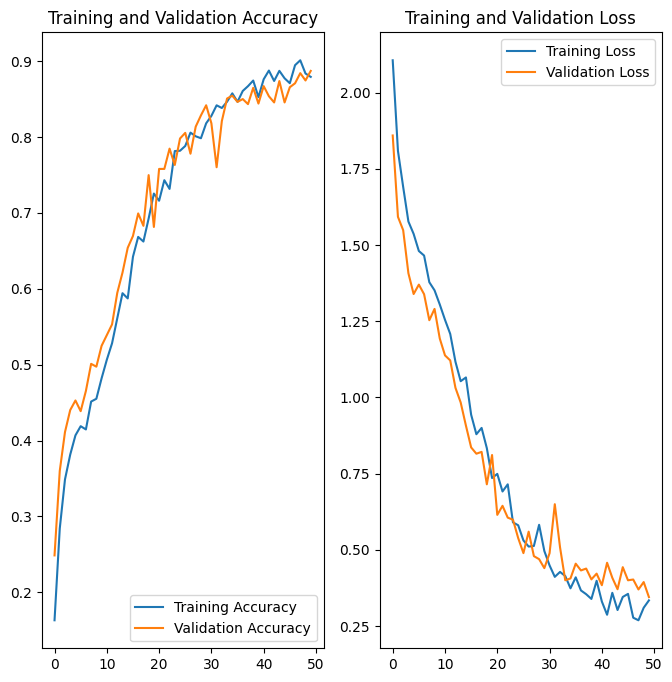

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Prediction


1/1 [==============================] - 0s 27ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


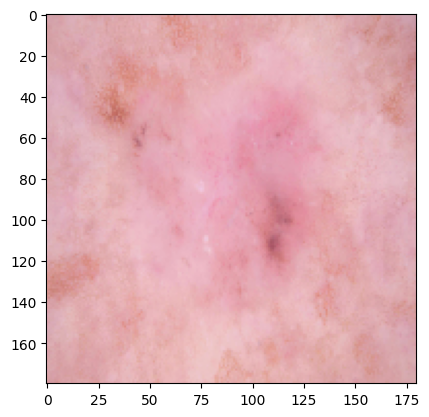

In [0]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-2],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

#Final outcome
- We can observe the model predicted the correct class 
- Adding more different samples can further help us to increase the model accuracy 
- Dropouts and Augumentation played a key role compared to any other layers to mitigate the overfitting
